In [1]:
import networkx as nx

In [2]:
# Create a graph
G = nx.wheel_graph(7)

print("Vertices:",G.nodes)
print("Edges:",G.edges)

Vertices: [0, 1, 2, 3, 4, 5, 6]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)]


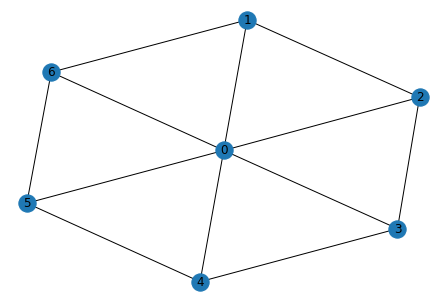

In [3]:
# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw( G, with_labels=True )

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: minimize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MINIMIZE )

# Add constraint for each edge
m.addConstrs( x[i] + x[j] >= 1 for i,j in G.edges )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 12 rows, 7 columns and 24 nonzeros
Model fingerprint: 0x9974511d
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 6 rows and 1 columns
Presolve time: 0.00s
Presolved: 6 rows, 6 columns, 12 nonzeros
Found heuristic solution: objective 4.0000000
Variable types: 0 continuous, 6 integer (6 binary)

Root relaxation: cutoff, 2 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0  

In [6]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 4.0
Selected nodes: [0, 2, 4, 6]


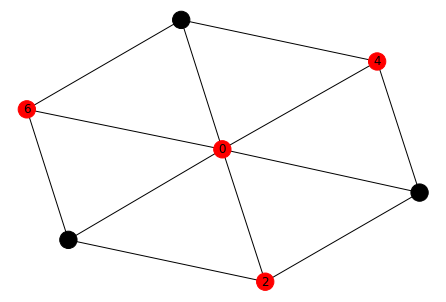

In [7]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )